### Collect Data

https://archive.ics.uci.edu/ml/datasets/Online+Retail

In [ ]:
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx --quiet

In [1]:
# Numerical libraries
import numpy as np   

from sklearn.model_selection import train_test_split

from sklearn.cluster import KMeans

# to handle data in form of rows and columns 
import pandas as pd    

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns
%matplotlib inline 

In [3]:
data = pd.read_excel('Online Retail.xlsx')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null datetime64[ns]
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 24.8+ MB


In [4]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [19]:
data['Country'].groupby(data['Country']).count()

Country
Australia                 1259
Austria                    401
Bahrain                     19
Belgium                   2069
Brazil                      32
Canada                     151
Channel Islands            758
Cyprus                     622
Czech Republic              30
Denmark                    389
EIRE                      8196
European Community          61
Finland                    695
France                    8557
Germany                   9495
Greece                     146
Hong Kong                  288
Iceland                    182
Israel                     297
Italy                      803
Japan                      358
Lebanon                     45
Lithuania                   35
Malta                      127
Netherlands               2371
Norway                    1086
Poland                     341
Portugal                  1519
RSA                         58
Saudi Arabia                10
Singapore                  229
Spain                     2533


### Load Data

Check dataset details

Remove missing values from the dataset

### Explore & Visualize Dataset

Number of Unique customers

In [20]:
data.CustomerID.nunique()

4372

Geograhic information

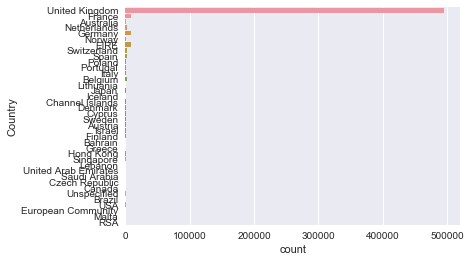

In [21]:
sns.countplot(y='Country', data=data)

Remove Non-UK records as enough Geographic details about other countries/region is not available.

In [22]:
df = data[data.Country.isin(['United Kingdom'])]

Number of Unique Products

In [29]:
df.StockCode.nunique()

4065

Invoice Date Range

### Remove Invoices for 'Returns'

Number of Returned invoices

Remove these invoices from the dataset

In [ ]:
df = df[~df.InvoiceNo.str.startswith('C').fillna(False)]

### Build a Customer Dataset

In [ ]:
cust_df = pd.DataFrame(df.CustomerID.unique(), columns=['CustomerID'])

### Recency of Purchase

In [ ]:
df['Recency'] = (pd.datetime(2011,12,10) - pd.to_datetime(df['InvoiceDate'])).dt.days

In [ ]:
df.head()

In [ ]:
recency_df = df.groupby('CustomerID', as_index=False).agg({'Recency':'min'})

In [ ]:
recency_df.shape

In [ ]:
cust_df = cust_df.merge(recency_df, left_on='CustomerID', right_on='CustomerID')

In [ ]:
cust_df.shape

In [ ]:
cust_df

### Frequency of Invoices

In [ ]:
cust_df = cust_df.merge(frequency_df, left_on='CustomerID', right_on='CustomerID')

In [ ]:
cust_df.shape

In [ ]:
cust_df

### Monetary Value of Purchases

Calculate total purchase price for each invoice

In [ ]:
cust_df = cust_df.merge(monetary_df, left_on='CustomerID', right_on='CustomerID')

In [ ]:
cust_df

Plot the data

### Standardize the data

### Applying K-Means

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
km = KMeans(n_clusters=2, #Number of clusters
            n_init=10, #How many times KMeans will be run with random centoid starts
            max_iter=300) #Maximum iterations

In [ ]:
km.fit()

Add cluster information to Dataframe

In [ ]:
cust_df['k_2'] = km.predict()

### Exploring 2 Clusters

Centroids

Visualize Clusters

Sum of Squared Error (SSE)

What does 2 Clusters tell us about the dataset

### How many Clusters to use?

Visualize K vs SSE

In [ ]:
sns.lineplot(x='K', y='SSE', data=sse_df)

Visualize clusters with K=5